In [209]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [210]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [211]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from datetime import datetime, timedelta

In [212]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [213]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [214]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [215]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [216]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [217]:
# Find the most recent date in the data set.
newest_date = engine.execute('Select max(date) From Measurement').fetchall()[0][0]
newest_date

'2017-08-23'

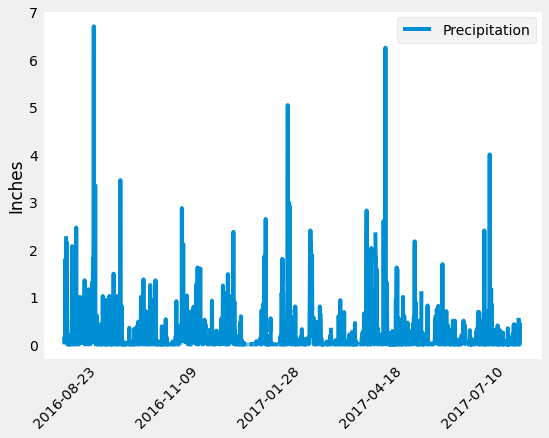

In [218]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
####Find the most recent date using func 
session.query(func.max(Measurement.date)).all()[0][0]
# Calculate the date one year from the last date in data set.
start = dt.datetime(2017,8,23)
start - dt.timedelta(days = 365)
# Perform a query to retrieve the date and precipitation scores
precipitation = pd.read_sql("SELECT date as Date, prcp as Precipitation FROM Measurement \
                              Where date >= '2016-08-23' ORDER by date ASC", conn)

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation = precipitation.set_index('Date')
precipitation
# Sort the dataframe by date (Completed)

# Use Pandas Plotting with Matplotlib to plot the data
p_df_chart = precipitation.plot(rot = 45, figsize=(8,6))
p_df_chart.set_ylabel('Inches')
p_df_chart.set_xlabel('')
p_df_chart.set_facecolor('white')
p_df_chart.grid(False)
plt.show()



In [219]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [220]:
# Design a query to calculate the total number stations in the dataset
engine.execute('Select count(station) From Station').fetchall()[0][0]

9

In [221]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations = engine.execute('Select station, count(station) From Measurement Group by station order by count(prcp) desc')
for station in stations:
    print(station)

('USC00519281', 2772)
('USC00513117', 2709)
('USC00519397', 2724)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [222]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(func.min(Measurement.tobs)).all()[0][0]
max_temp = session.query(func.max(Measurement.tobs)).all()[0][0]
avg_temp = session.query(func.avg(Measurement.tobs)).all()[0][0]
print(f'The minimum temperature for the Waihee station was {round(min_temp)} F')
print(f'The maximum temperature for the Waihee station was {round(max_temp)} F')
print(f'The average temperature for the Waihee station was {round(avg_temp)} F')

The minimum temperature for the Waihee station was 53 F
The maximum temperature for the Waihee station was 87 F
The average temperature for the Waihee station was 73 F


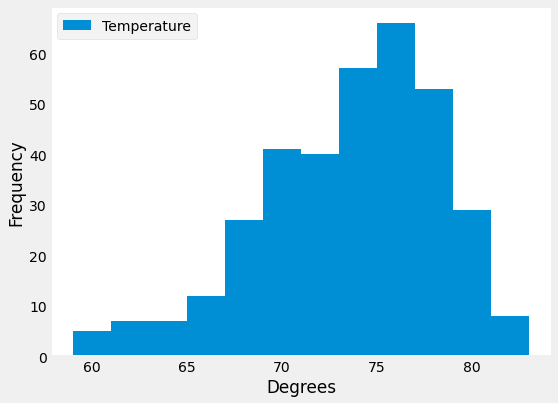

In [223]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station = pd.read_sql("SELECT date as Date, tobs as Temperature FROM Measurement \
                                Where date >= '2016-08-23' AND station = 'USC00519281'", conn)
as_chart = active_station.plot.hist(bins = 12, figsize=(8,6))
as_chart.set_facecolor('white')
as_chart.set_xlabel('Degrees')
as_chart.grid(False)



# Close session

In [224]:
# Close Session
session.close()